In [1]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib import style      
style.use("ggplot")

import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize     
from nltk.stem import WordNetLemmatizer      
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import re
import string

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = pd.read_csv("./train_hu.csv",encoding='latin-1')
data.head()

,tweet,class
0,RT : N?ként nem szabadna panaszkodnod a takarí...,2
1,"RT Dawg RT : Dugtál már valaha egy ribancot, ...",1
2,"RT : úgy néz ki, mint egy transzvesztita",1
3,"RT : A szar, amit rólam hallasz, lehet, hogy ...",1
4,: A szar csak fújja meclaim te olyan h?séges é...,1


In [6]:
data['tweet']=data['tweet'].apply(str)

In [7]:
# to get more info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7741 entries, 0 to 7740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7741 non-null   object
 1   class   7741 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [8]:
data.describe()

,class
count,7741.000000
mean,1.088361
std,0.498001
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [9]:
data.shape

(7741, 2)

In [10]:
data["labels"] = data["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
print(data.head())

                                               tweet  class  \
0  RT : N?ként nem szabadna panaszkodnod a takarí...      2   
1   RT Dawg RT : Dugtál már valaha egy ribancot, ...      1   
2           RT : úgy néz ki, mint egy transzvesztita      1   
3   RT : A szar, amit rólam hallasz, lehet, hogy ...      1   
4  : A szar csak fújja meclaim te olyan h?séges é...      1   

                  labels  
0  No Hate and Offensive  
1     Offensive Language  
2     Offensive Language  
3     Offensive Language  
4     Offensive Language  


In [11]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,RT : N?ként nem szabadna panaszkodnod a takarí...,No Hate and Offensive
1,"RT Dawg RT : Dugtál már valaha egy ribancot, ...",Offensive Language
2,"RT : úgy néz ki, mint egy transzvesztita",Offensive Language
3,"RT : A szar, amit rólam hallasz, lehet, hogy ...",Offensive Language
4,: A szar csak fújja meclaim te olyan h?séges é...,Offensive Language


In [10]:
# Data Preprocessing

In [14]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_hu = file.read().splitlines()
    return set(stopwords_hu)

stopwords_hu = load_stopwords("./hungarian.txt")

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w.lower() in stopwords_hu] #removing stopwords
    return " ".join(filtered_tweets)

In [ ]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_hu = file.read().splitlines()
    return set(stopwords_hu)

stopwords_hu = load_stopwords("./hungarian.txt")

def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if word.lower() not in stopwords_hu]
    text = " ".join(text)
    return text


In [15]:
#applying pre-processing to text data
data.tweet=data['tweet'].apply(clean)

In [16]:
data.head()

,tweet,labels
0,rt nként szabadna panaszkodnod takarítás miatt...,No Hate and Offensive
1,rt dawg rt dugtál valaha ribancot elkezdett sí...,Offensive Language
2,rt néz transzvesztita,Offensive Language
3,rt szar rólam hallasz igaz hamisabb ribanc elm...,Offensive Language
4,szar fújja meclaim te hséges lefelé kibaszott ...,Offensive Language


In [17]:
# removing duplicate data
tweetData = data.drop_duplicates("tweet")

In [18]:
# to see updated number of columns as duplicates entries are removed
tweetData.shape

(7376, 2)

In [19]:
tweetData.isnull().sum()

tweet     0
labels    0
dtype: int64

In [12]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [13]:
#lemmatizing the processed data
tweetData.loc[:, 'tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))

In [20]:
# to see the data after pre-processing
print(tweetData["tweet"].iloc[0],"\n")
print(tweetData["tweet"].iloc[1],"\n")
print(tweetData["tweet"].iloc[2],"\n")
print(tweetData["tweet"].iloc[3],"\n")
print(tweetData["tweet"].iloc[4],"\n")

rt nként szabadna panaszkodnod takarítás miatt férfiként vinned szemetet 

rt dawg rt dugtál valaha ribancot elkezdett sírni összezavarodtál szar 

rt néz transzvesztita 

rt szar rólam hallasz igaz hamisabb ribanc elmondta neked 

szar fújja meclaim te hséges lefelé kibaszott kurvák 



In [21]:
# to see distribution of labels
tweetData['labels'].value_counts()

labels
Offensive Language       5502
No Hate and Offensive    1283
Hate Speech               591
Name: count, dtype: int64

/tmp/ipykernel_217/185089953.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


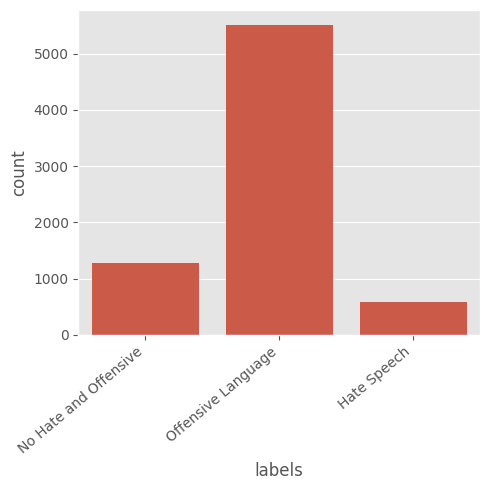

In [22]:
# to visualize the data using a count plot
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='labels', data=tweetData)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

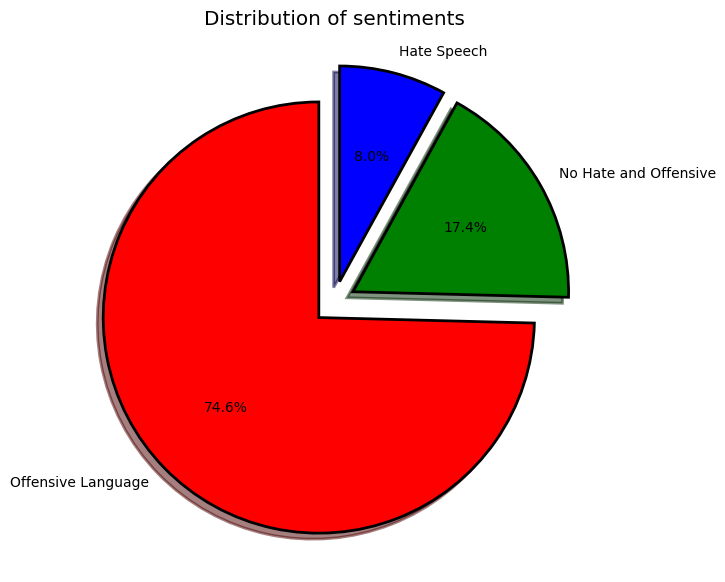

In [23]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweetData['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

/tmp/ipykernel_217/1833571062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetData['tweet_length'] = tweetData['tweet'].apply(len)


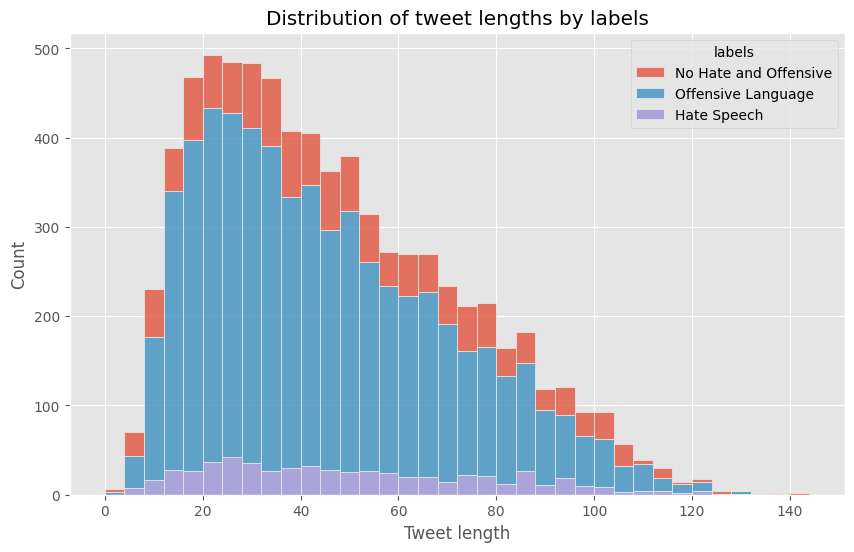

In [24]:
# creating a new column for tweet length
tweetData['tweet_length'] = tweetData['tweet'].apply(len)

# plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=tweetData, x='tweet_length', hue='labels', multiple='stack')
plt.title('Distribution of tweet lengths by labels')
plt.xlabel('Tweet length')
plt.ylabel('Count')
plt.show()

In [25]:
# visualizing non-hate tweets
non_hate_tweets = tweetData[tweetData.labels=='No Hate and Offensive']
non_hate_tweets.head()

,tweet,labels,tweet_length
0,rt nként szabadna panaszkodnod takarítás miatt...,No Hate and Offensive,72
39,anyuci mondta macska kutyaházamban,No Hate and Offensive,34
64,woof woof forró talpak,No Hate and Offensive,22
65,lemmie egyél oreot csináld ezeket ételeket ore...,No Hate and Offensive,51
68,padlizsán emoji doey mondta nézett sikoly lmao,No Hate and Offensive,46


In [26]:
non_hate_tweets.value_counts()

tweet                                                                             labels                 tweet_length
üzenet embernökségnek charlie chaplin                                             No Hate and Offensive  37              1
adam jones homers yankees vezet monsta                                            No Hate and Offensive  38              1
adam west rt lmao szemét b                                                        No Hate and Offensive  26              1
érdekel jobb képet akartam látni talpról                                          No Hate and Offensive  40              1
érdekes                                                                           No Hate and Offensive  7               1
                                                                                                                        ..
aha sobs reménykedtem nemzeti srác beleértve kipermcshay mockot mondta lecsúszik  No Hate and Offensive  80              1
ahelyett elhinnéd emb

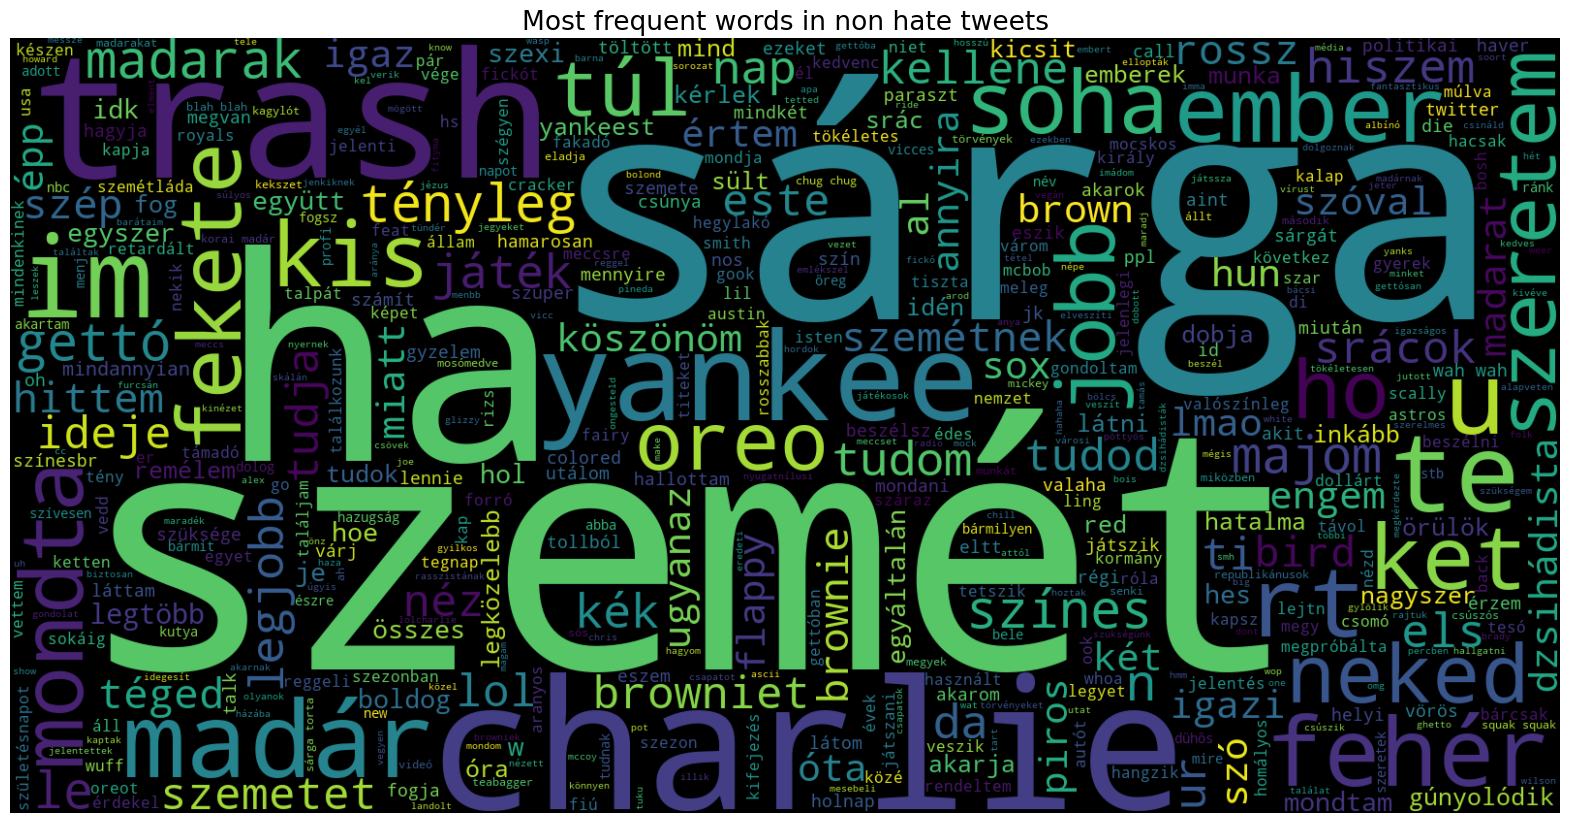

In [27]:
# visualizing non-hate tweets using word cloud
text=''.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()

In [31]:
#TF-IDF Trigram Model

In [32]:
#creating a trigram language model
vect=TfidfVectorizer(ngram_range=(1,3)).fit(tweetData['tweet'])

In [33]:
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 87743
First 200 features: 
 ['aaaaaaaaaaaa' 'aaaaaaaaaaaa kezddik' 'aaaaaaaaaaaa kezddik rt'
 'aahahahah' 'aahahahah fasz' 'aahahahah fasz nézi' 'aap' 'aap maoisták'
 'aap maoisták terroristák' 'aap rocky' 'aap rocky via' 'abba'
 'abba beszédet' 'abba beszédet húzza' 'abba beszédet köpködés'
 'abba blowin' 'abba dühös' 'abba dühös madár' 'abba feltételezés'
 'abba feltételezés kurva']


In [34]:
tweetData.shape

(7376, 3)

In [35]:
#Split Dataset

In [36]:
#separating the data into x and y to build the model
X = tweetData['tweet']
Y = tweetData['labels']
X = vect.transform(X) #transforming the x data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
#printing the size of training and testing data
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (5900, 87743)
Size of Y_train (5900,)
Size of X_test (1476, 87743)
Size of Y_test (1476,)


In [39]:
# Model Training & Testing

In [40]:
#Logistic Regression

In [41]:
#for training the data on logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train) #loading x_train and y_train data on model
logreg_predict = logreg.predict(X_test) #predicting the value for test data
logreg_acc = accuracy_score(logreg_predict, Y_test)

In [42]:
print("Test accuracy: {:.2f}%".format(logreg_acc*100)) #printing accuracy of the model

Test accuracy: 78.18%


In [43]:
#printing classification report
print(classification_report(Y_test, logreg_predict))

                       precision    recall  f1-score   support

          Hate Speech       0.43      0.03      0.06        96
No Hate and Offensive       0.91      0.09      0.16       245
   Offensive Language       0.78      1.00      0.88      1135

             accuracy                           0.78      1476
            macro avg       0.71      0.37      0.36      1476
         weighted avg       0.78      0.78      0.70      1476



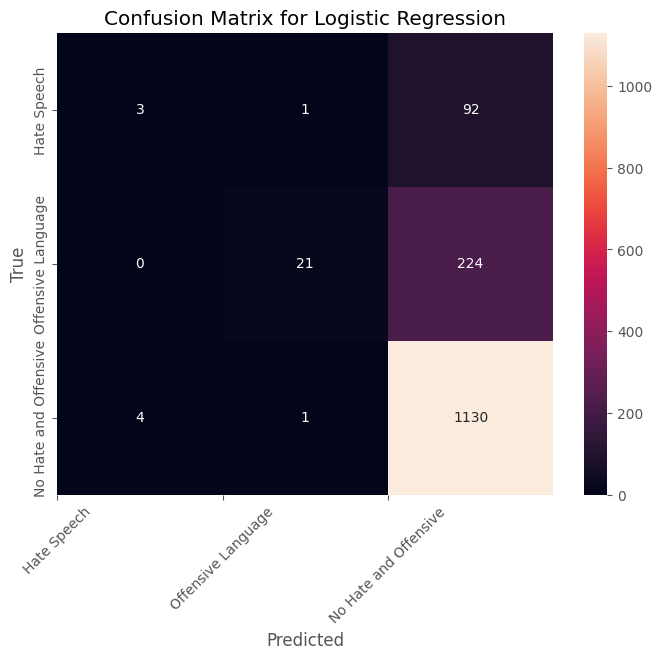

In [44]:
# Confusion matrix
cm = confusion_matrix(Y_test, logreg_predict)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [45]:
#Hyperparameter Tuning - GridSearchCV

In [45]:
#for performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [46]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, Y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.78
Best parameters:  {'C': 100, 'solver': 'lbfgs'}


In [47]:
log_grid_pred = grid.predict(X_test)

In [48]:
log_grid_acc = accuracy_score(log_grid_pred, Y_test)
print("Test accuracy: {:.2f}%".format(log_grid_acc*100)) #printing model accuracy after applying hyperparamenter tuning

Test accuracy: 81.78%


In [49]:
print(classification_report(Y_test, log_grid_pred))

                       precision    recall  f1-score   support

          Hate Speech       0.50      0.08      0.14        96
No Hate and Offensive       0.89      0.32      0.47       245
   Offensive Language       0.82      0.99      0.89      1135

             accuracy                           0.82      1476
            macro avg       0.73      0.46      0.50      1476
         weighted avg       0.81      0.82      0.78      1476



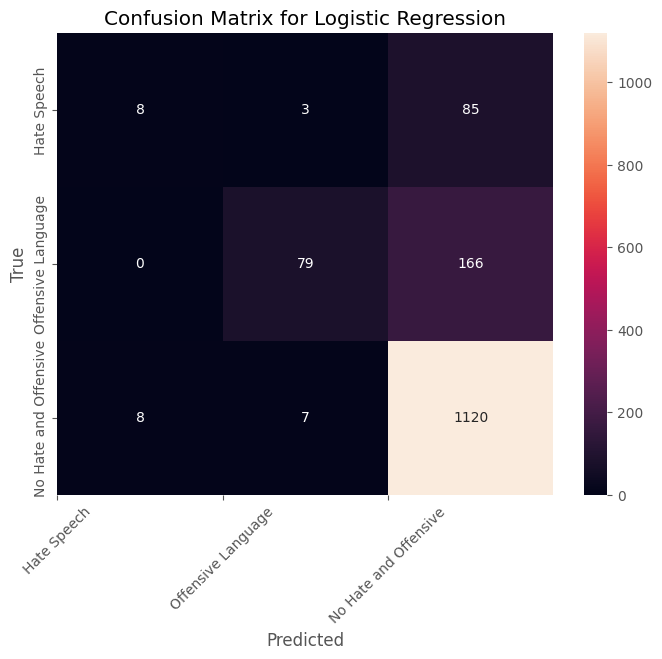

In [50]:
# Confusion matrix
cm = confusion_matrix(Y_test, log_grid_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [51]:
# hyperparameter tuning for above logistic regression

from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}

# Create a logistic regression object
logreg = LogisticRegression()

# Instantiate the GridSearchCV object
clf = GridSearchCV(logreg, grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
clf.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters:", clf.best_params_)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'C': 100, 'penalty': 'l2'}
Test accuracy: 0.8177506775067751


In [57]:
logreg_mcc = matthews_corrcoef(Y_test, y_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(logreg_mcc))

Matthews Correlation Coefficient (MCC): 0.40


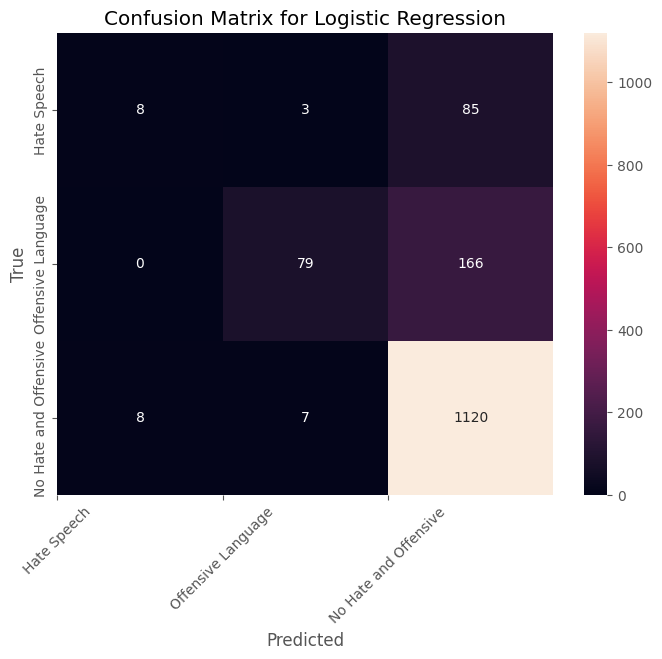

In [52]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [53]:
#2. Decision Tree Classifier

In [27]:
#for training the data on decision tree classifier model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train) #loading x_train and y_train data on model
dtree_pred = dtree.predict(X_test) #predicting the value for test data
dtree_acc = accuracy_score(dtree_pred, Y_test)

In [28]:
print("Test accuracy: {:.2f}%".format(dtree_acc*100)) #printing accuracy of the model

Test accuracy: 78.08%


In [29]:
#printing classification report
print(classification_report(Y_test, dtree_pred))

                       precision    recall  f1-score   support

          Hate Speech       0.34      0.18      0.23       119
No Hate and Offensive       0.63      0.49      0.55       251
   Offensive Language       0.83      0.91      0.87      1108

             accuracy                           0.78      1478
            macro avg       0.60      0.53      0.55      1478
         weighted avg       0.75      0.78      0.76      1478



In [30]:
decisiontree_mcc = matthews_corrcoef(Y_test, dtree_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(decisiontree_mcc))

Matthews Correlation Coefficient (MCC): 0.39


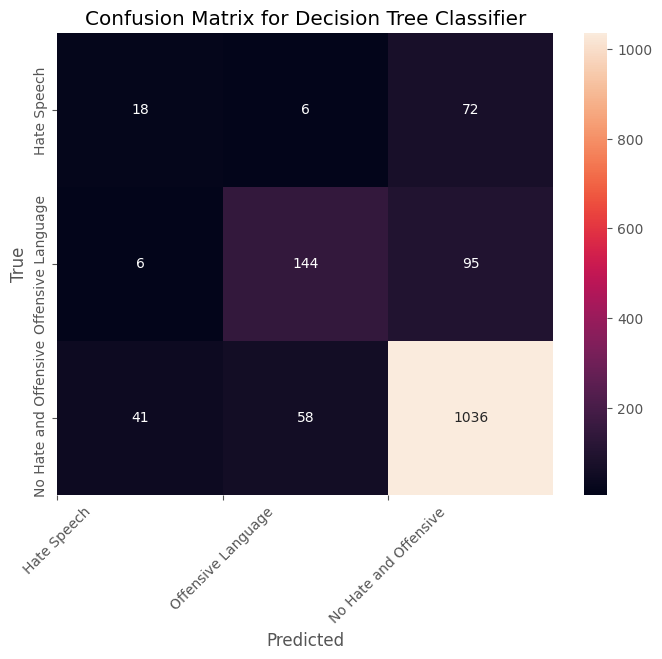

In [57]:
# Confusion matrix
cm = confusion_matrix(Y_test, dtree_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [53]:
# prompt: hyperparameter tuning for above decision tree
# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create a decision tree classifier object
dtree = DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict on the test data
dtree_pred = grid_search.predict(X_test)
# Evaluate the model
dtree_acc = accuracy_score(Y_test, dtree_pred)
print("Test accuracy: {:.2f}%".format(dtree_acc * 100))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Test accuracy: 79.70%


In [54]:
#printing classification report
print(classification_report(Y_test, dtree_pred))

                       precision    recall  f1-score   support

          Hate Speech       0.41      0.19      0.21       119
No Hate and Offensive       0.66      0.48      0.58       251
   Offensive Language       0.84      0.93      0.88      1108

             accuracy                           0.80      1478
            macro avg       0.64      0.55      0.58      1478
         weighted avg       0.77      0.80      0.78      1478



In [56]:
decisiontree_mcc = matthews_corrcoef(Y_test, dtree_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(decisiontree_mcc))

Matthews Correlation Coefficient (MCC): 0.41


In [59]:
# 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, Y_train)

# Predict on the test data
rfc_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, rfc_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8170731707317073


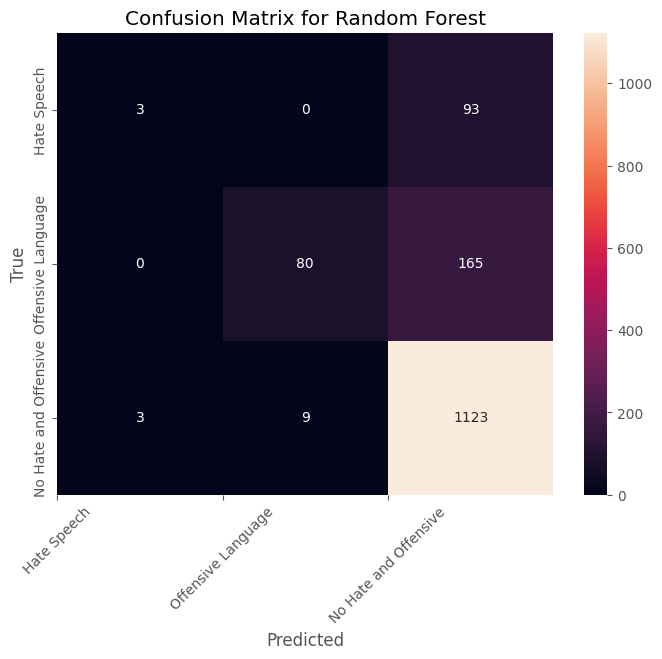

In [61]:
# Confusion matrix
cm = confusion_matrix(Y_test, rfc_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [62]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rfc, param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

rfc_hyper_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, rfc_hyper_pred)
print("Test accuracy:", accuracy)

Best Cross validation score: 0.78
Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test accuracy: 0.8191056910569106


In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_test, rfc_hyper_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

In [39]:
#printing classification report
print(classification_report(Y_test, rfc_hyper_pred))

                       precision    recall  f1-score   support

          Hate Speech       0.60      0.05      0.08       119
No Hate and Offensive       0.89      0.48      0.43       251
   Offensive Language       0.79      0.99      0.88      1108

             accuracy                           0.82      1478
            macro avg       0.66      0.43      0.44      1478
         weighted avg       0.76      0.79      0.73      1478



In [40]:
randomforest_mcc = matthews_corrcoef(Y_test, rfc_hyper_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(randomforest_mcc))

Matthews Correlation Coefficient (MCC): 0.42


In [ ]:
# 4. SVM

In [33]:
from sklearn.svm import SVC

# Instantiate the SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, Y_train)

# Predict on the test data
svm_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, svm_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8194492044063647


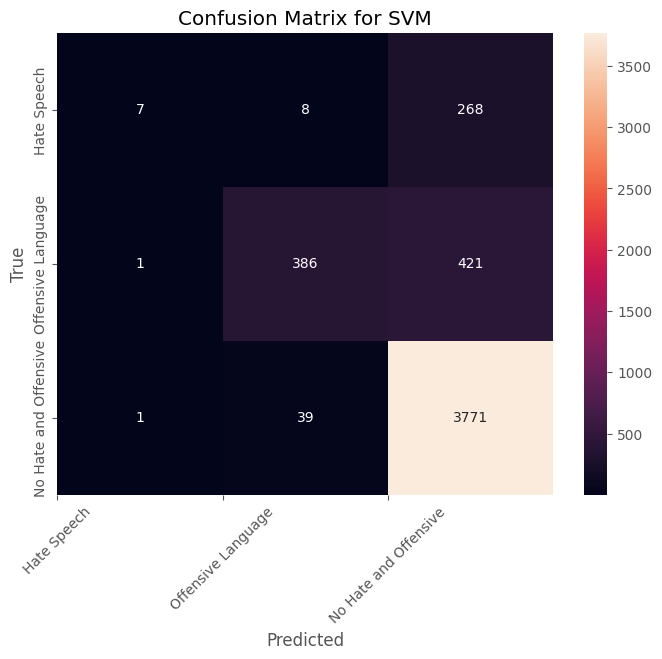

In [34]:
# Confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Define labels for the axes
labels = ['Hate Speech', 'Offensive Language', 'No Hate and Offensive']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.xticks(ticks=[0, 1, 2], labels=labels, rotation=45)
plt.show()

Best Cross validation score: 0.79
Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
Test accuracy: 0.822088903924222


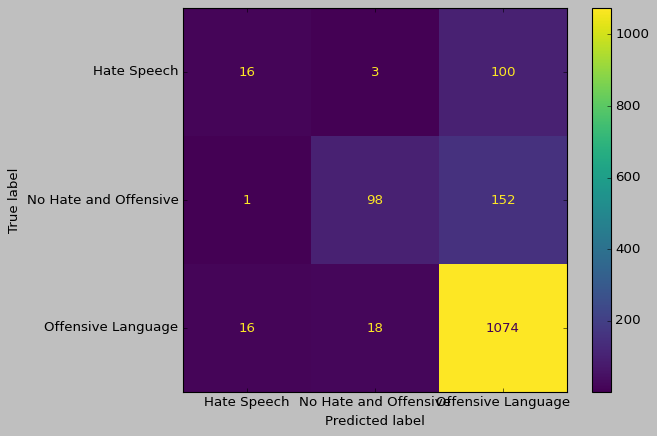

In [23]:
# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

svm_hyper_pred = grid.predict(X_test)
accuracy = accuracy_score(Y_test, svm_hyper_pred)
print("Test accuracy:", accuracy)

#for visualizing confusion matrix
style.use('classic')
cm = confusion_matrix(Y_test, svm_hyper_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [24]:
#printing classification report
print(classification_report(Y_test, svm_hyper_pred))

                       precision    recall  f1-score   support

          Hate Speech       0.48      0.13      0.21       119
No Hate and Offensive       0.87      0.39      0.53       251
   Offensive Language       0.81      0.97      0.88      1108

             accuracy                           0.82      1478
            macro avg       0.71      0.50      0.54      1478
         weighted avg       0.79      0.80      0.77      1478



In [25]:
svm_mcc = matthews_corrcoef(Y_test, svm_hyper_pred)
print("Matthews Correlation Coefficient (MCC): {:.2f}".format(svm_mcc))

Matthews Correlation Coefficient (MCC): 0.42


Test accuracy: 0.7604871447902571


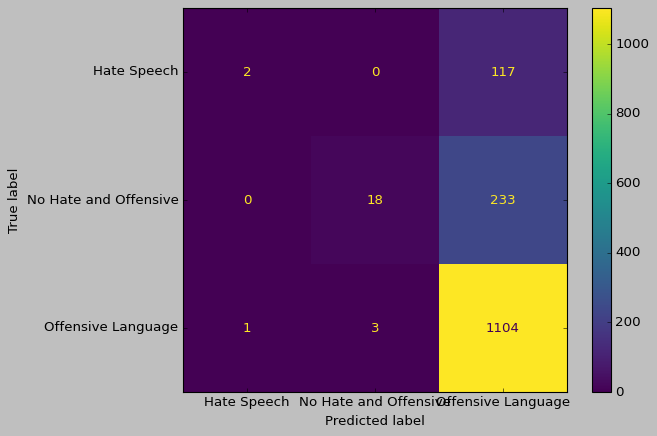

In [26]:
# should we apply any ensemble of multiple models?

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the base models
estimators = [
    ('logistic_regression', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC())
]

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(X_train, Y_train)

# Make predictions on the test set
ensemble_predictions = ensemble.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, ensemble_predictions)
print("Test accuracy:", accuracy)

#for visualizing confusion matrix
style.use('classic')
cm = confusion_matrix(Y_test, ensemble_predictions, labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)
disp.plot()